## Régression

### Informations sur le Projet

- **Auteur** : Fono Colince  
  
- **Lien vers les datasets** :  
  - [Dataset : Advertising Sales](https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset/data)
  - [Dataset : House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)


### Description:

L'ensemble de données publicitaires capture les revenus de vente générés par les coûts publicitaires sur plusieurs canaux tels que la radio, la télévision et les journaux.

Il est nécessaire de comprendre l’impact des budgets publicitaires sur les ventes globales.

### Reconnaissance:
L'ensemble de données est tiré de Kaggle

### Objectif:

- Comprendre l'ensemble de données et le nettoyer (si nécessaire).
- Créez des modèles de régression pour prédire les ventes par rapport à une ou plusieurs fonctionnalités.
- Évaluez également les modèles et comparez leurs scores respectifs comme R2, RMSE, etc.

In [27]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import pickle

In [3]:
sales = pd.read_csv('../data/AdvertisingSales.csv')
sales.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
id = sales['Unnamed: 0']
sales = sales.drop('Unnamed: 0', axis= 1)

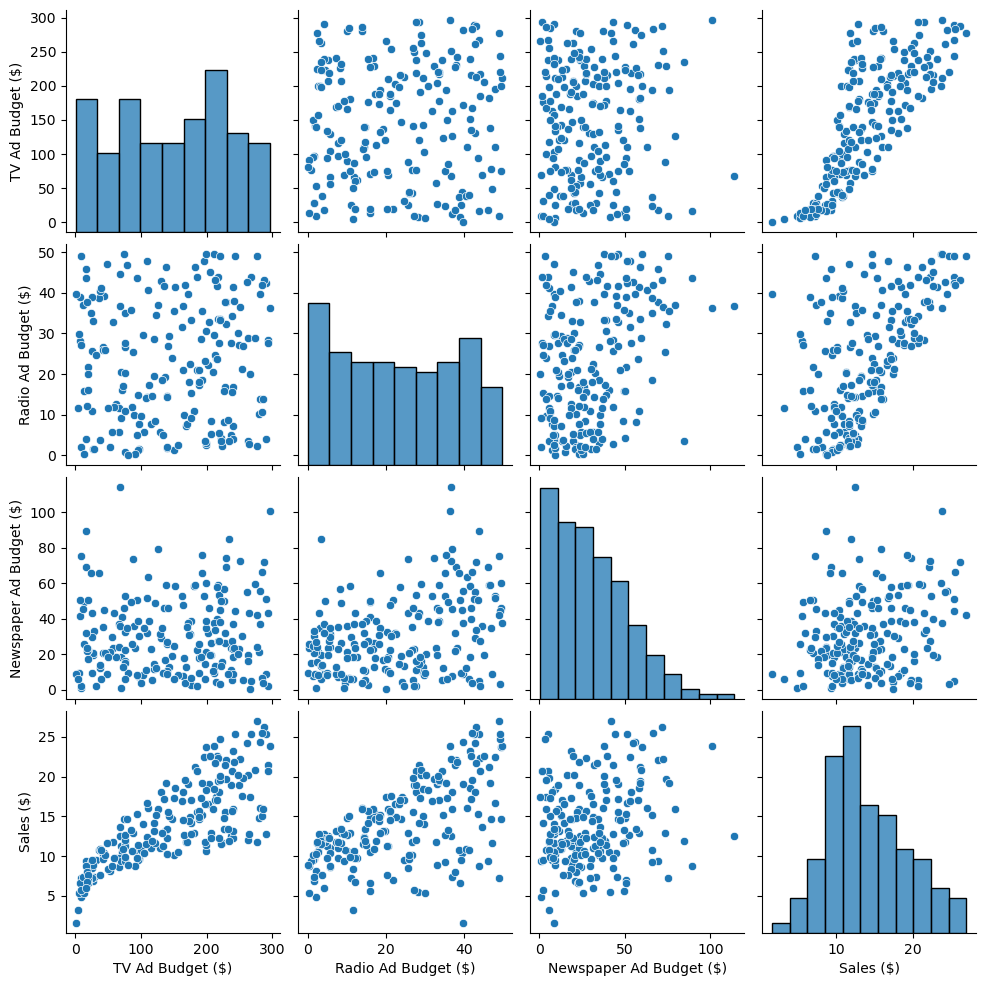

In [5]:
sns.pairplot(sales)

In [6]:
sales.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
sales.describe()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
sales.shape

(200, 4)

In [10]:
sales.corr()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
TV Ad Budget ($),1.000000,0.054809,0.056648,0.782224
Radio Ad Budget ($),0.054809,1.000000,0.354104,0.576223
Newspaper Ad Budget ($),0.056648,0.354104,1.000000,0.228299
Sales ($),0.782224,0.576223,0.228299,1.000000


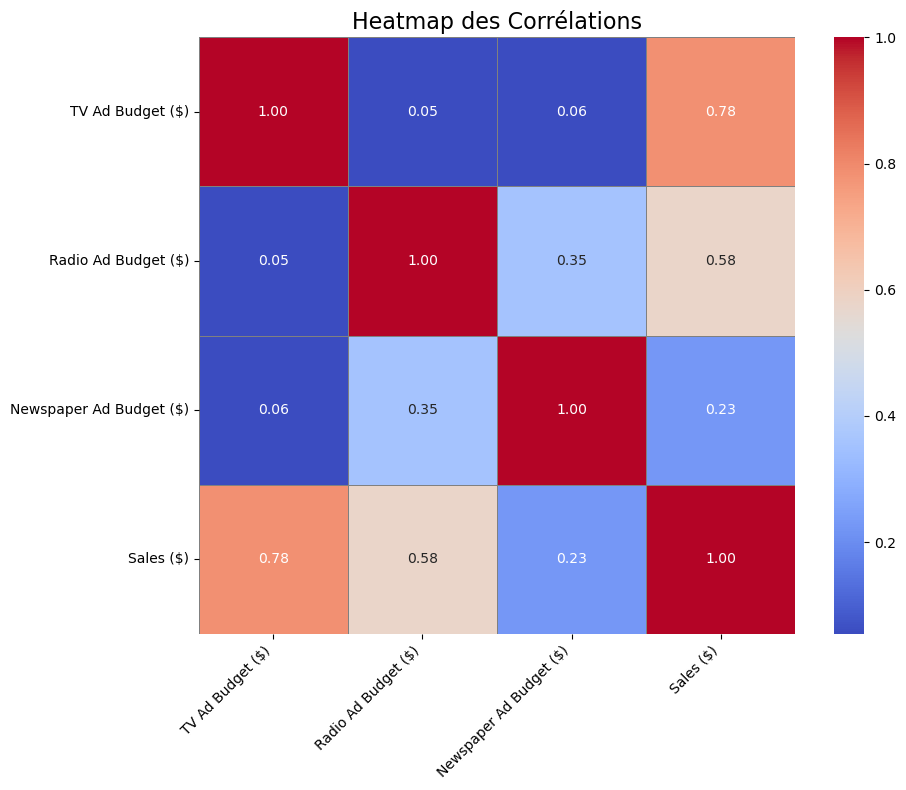

In [11]:
plt.figure(figsize=(10, 8))  
sns.heatmap(
    sales.corr(),               
    annot=True,                 
    fmt=".2f",                  
    cmap="coolwarm",            
    linewidths=0.5,             
    linecolor='gray',           
    cbar=True,                  
    square=True                
)
plt.title("Heatmap des Corrélations", fontsize=16) 
plt.xticks(rotation=45, ha="right") 
plt.yticks(rotation=0)               
plt.tight_layout()                   
plt.show()


In [12]:
sales.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

## Visualisation

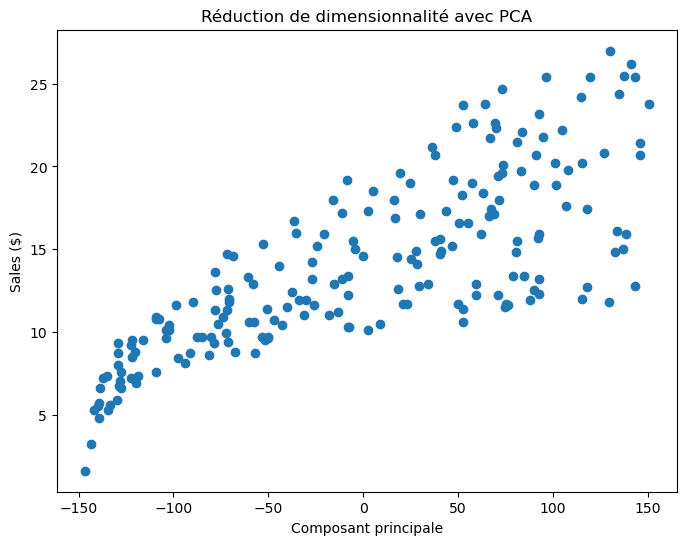

In [13]:
y = sales['Sales ($)'].to_numpy()
X = sales.drop(['Sales ($)'], axis=1).to_numpy()

pca = PCA(n_components=1, random_state=42)
X_pca = pca.fit_transform(X)


# Visualiser les résultats du t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_pca, y)
plt.title('Réduction de dimensionnalité avec PCA')
plt.xlabel('Composant principale')
plt.ylabel('Sales ($)')
plt.show()

## Modele

In [14]:
y = sales['Sales ($)'].to_numpy()
X = sales.drop(['Sales ($)','Newspaper Ad Budget ($)'], axis=1).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

lr = LinearRegression()
lr.fit(X_train,y_train)

ypred = lr.predict(X_test)

In [15]:
df = pd.DataFrame({'true': y_test, 'pred': ypred})
df.head(8)

,true,pred
0,16.9,16.357473
1,22.4,20.862994
2,21.4,21.525058
3,7.3,10.587198
4,24.7,22.224596
5,12.6,13.060705
6,22.3,21.095644
7,8.4,7.476411


In [16]:
mean_squared_error(y_test,ypred)

3.137948009068353

In [17]:
r2_score(y_test,ypred)

0.9005833101920356

### Polynomial modele

In [18]:
y = sales['Sales ($)'].to_numpy()
X = sales.drop(['Sales ($)','Newspaper Ad Budget ($)'], axis=1).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_poly,y_train)

ypredtest = lr.predict(X_test_poly)
ypredtrain = lr.predict(X_train_poly)

In [19]:
df = pd.DataFrame({'true': y_test, 'pred': ypredtest})
df.head(8)

,true,pred
0,16.9,17.098204
1,22.4,22.397424
2,21.4,21.304260
3,7.3,6.934354
4,24.7,24.079773
5,12.6,12.866757
6,22.3,22.456934
7,8.4,8.677218


In [20]:
print('MSE test = ', mean_squared_error(y_test,ypredtest))
print('MSE train = ', mean_squared_error(y_train,ypredtrain))

MSE test =  0.17871043029003228
MSE train =  0.25620240099706304


In [21]:
print('r2_score test = ', r2_score(y_test,ypredtest))
print('r2_score train = ', r2_score(y_train,ypredtrain))

r2_score test =  0.9943380835621726
r2_score train =  0.990121841014138


## save model

In [26]:
with open("../modeles/modelSales.pkl", "wb") as f:
    pickle.dump(lr, f)

In [28]:
with open("../modeles/poly_transformer.pkl", "wb") as f:
    pickle.dump(poly, f)

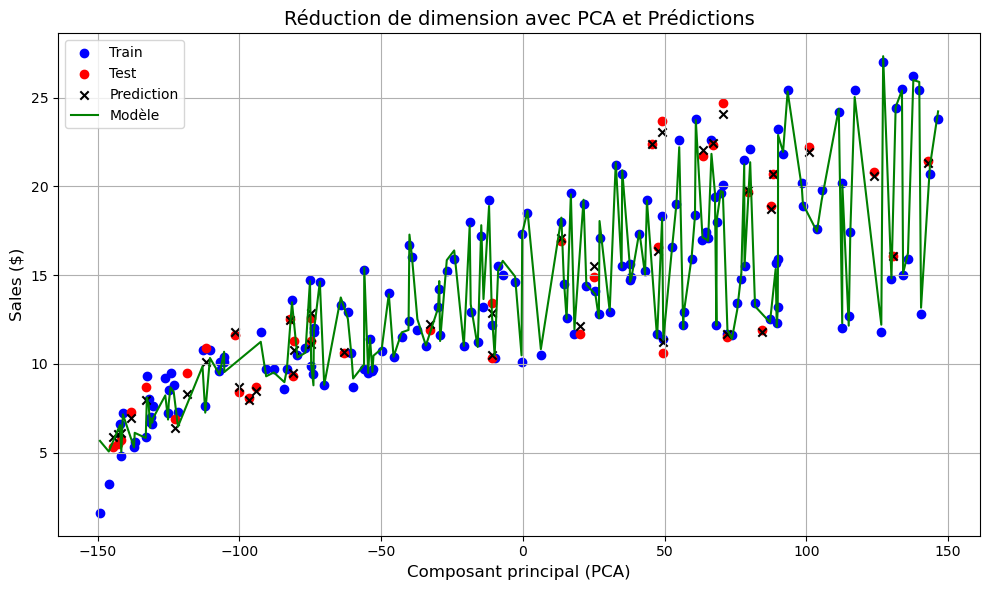

In [34]:
pca = PCA(n_components=1, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test) 

df = pd.DataFrame({'X_train_pca': X_train_pca.flatten(), 'ypredtrain': ypredtrain})
df = df.sort_values(by='X_train_pca')

plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca, y_train, c='blue', label='Train')
plt.scatter(X_test_pca, y_test, c='red', label='Test')
plt.scatter(X_test_pca, ypredtest, c='black', label='Prediction', marker='x')

# Ajout du modele
plt.plot(df['X_train_pca'], df['ypredtrain'], color='green', label='Modèle')


# Configurations du graphe
plt.title('Réduction de dimension avec PCA et Prédictions', fontsize=14)
plt.xlabel('Composant principal (PCA)', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


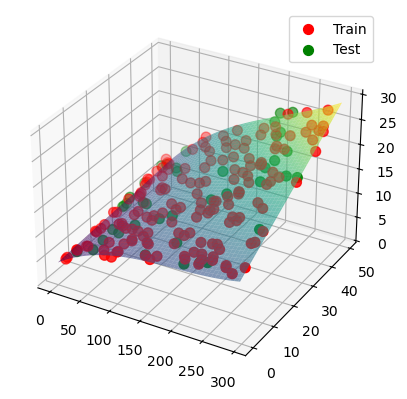

In [23]:
from mpl_toolkits.mplot3d import Axes3D


x = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 100)
y = np.linspace(min(X_train[:, 1]), max(X_train[:, 1]), 100)

x, y = np.meshgrid(x, y)

X_grid_poly = poly.transform(np.c_[x.ravel(), y.ravel()]) 

z = lr.predict(X_grid_poly) 
z = z.reshape(x.shape)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(x, y, z, cmap='viridis', alpha=0.6)
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='r', s=50, label='Train')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='green', s=50, label='Test')
ax.legend()
plt.show()
